## Sales Analysis Prepared by Sumit Sarda
Import Necessary Libraries

In [1]:
import pandas as pd
import os

### Merge the 12 months of sales data into a single CSV path

we have CSVs files for each month so we have to first merge all the CSVs into one CSVs so that it'll be easy for us to perform analysis on one single CSV file


##### HOW WE DONE THIS :  
we first checked how many files are present in the directories and then we create an empty dataframe to store all the CSVs
and then iterate through each file using for loop and append all the files one by one in the empty directory i.e. all_data
and then we convert the data into csv file using "to_csv" function

In [2]:
df = pd.read_csv("./Sales_data/Sales_April_2019.csv")  # ./ if your ntebook is in same directory as your data



files = [file for file in os.listdir('./Sales_Data')]  # to check how many files are present in directory

all_months_data = pd.DataFrame() # create empty dataframe to store all the data

for file in files:
    df = pd.read_csv("./Sales_data/" +file)
    all_months_data = pd.concat([all_months_data, df])  # here I concat the empty dataframe and all our data which is in df

all_months_data.to_csv("all_data.csv", index=False)

## Read in updated dataframe

here I was facing an issue that after the 0th index there was an empty row so it'll effect my analysis that is why I dropped that row using ".drop" function and it was at the 1st index, axis = 0 represents row axis = 1 represent column

In [3]:
all_data = pd.read_csv("all_data.csv")

all_data = all_data.drop(all_data.index[[1]], axis=0)

all_data.reset_index(drop=True, inplace=True) # We can use the drop parameter to avoid the old index being added as a column:

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Clean up the data

now on further analysis I noticed that there are lot of rows present with NaNs i just dropped one but there are many more so I dropped all the row in which cell contains NaN

Thank god! there is a function for handling NaN too in pandas :)  used ".isna" function for finding NaN and ".any" means if in whole row there is only one Nan then also retrun that row and if all the cells in the row is NaN then return that too 

##### Drop rows of NAN
".dropna" is a function to drop NaN

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)] # got this from stackoverflow to find nan in rows
# isna is a function for NaN

nan_df.head()

all_data =all_data.dropna(how='all')
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### find 'Or' and delete it

so in between I was dealing with months in order date you'll see later in the notebook 
I grabbed the month from the order date which is string so I tried to convert it into integer but comes up with the error
ValueError : invalid literal for int() with base 10: 'Or'
means somewhere in the data there is a row in which month is Or instead of 04 or 06

so I have to find it and delete it

what I did is I updated my data which exclude the entry having order date = 'Or'

index of month in Order Date is 0 and 1 so I did indexing 0:2 which grab the month and != to 'Or' and that's how I get rid of it

In [5]:
# temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
# temp_df.head()

# so let's include data except Or one so we can do it by just replacing == into not equals

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### convert columns to the correct datatype

In [6]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # this is string but we have to convert it into int to calculate sales
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # make float

# to_numeric is function to onvert the datatype into numeric

### Augment data with additional columns

### Add Month Column 

So month is in order data column and first two strings represents month
so what if we grab the first two characters from order date column and store it
in a new column Month.

For that we have the first comvert the column order date into string and then by list indexing we can grab the first 2 characters

month is the first 2 index of order date so we could easily get this by doing string indexing and then convert the month column into integer by using ".astype" function

In [7]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32') # this is for converting month column which is string into integer as data is integer
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Task 3 : Add a sales column

now sales means Quantity ordered * Price and then store it in a new column

In [8]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


###  Task 4: Add a city column

let's use .apply(): it allowas us to run any finction on our dataframe 

as you can see the name of city is in between by 2 comman so we can split on commas 

so I made a function which split the date so that it'll be easy to use

then I realized that in USA there are more than one states having same city name so to just include city will mislead out analysisi so I also get the state 

In [9]:
def get_city(address):
    return address.split(',')[1]  # after splitting street add, city, state code   you can see index of city is 1 that is why [1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]   

# only seperated by comma will give state as well as zip code but we only need state so we have 
# to split it again by blank space and then return the index of state i.e [1]

# <space>state<space>code is further splitted with the blank space in between them and then index of state is 1

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") # we can use f string to get result

# cities are at the first index that is why [1]


# all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])  # cities are at the first index that is why [1]

# so whatdoes this function does that x value is the cell content so for each of the cell content we wants  
# split it by commas and grav the first index value

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


 ### Question 1 : what was the best month for sales? How much was earned that month
 
 Here what I did is I group all the data using ".groupby" function based on month column and sum all the values using ".sum()" function to know which month has the best sales


As we can see from the results that Quantity ordered in december is highest so sales will be the highest and vice a versa for Jan

In [10]:
results = all_data.groupby('Month').sum() # we can see here that december is best month in terms of sales and jan is the worst

print(results)

       Quantity Ordered    Price Each         Sales
Month                                              
1                 10903  1.811768e+06  1.822257e+06
2                 13449  2.188885e+06  2.202022e+06
3                 17005  2.791208e+06  2.807100e+06
4                 20558  3.367671e+06  3.390670e+06
5                 18667  3.135125e+06  3.152607e+06
6                 15253  2.562026e+06  2.577802e+06
7                 16072  2.632540e+06  2.647776e+06
8                 13448  2.230345e+06  2.244468e+06
9                 13109  2.084992e+06  2.097560e+06
10                22703  3.715555e+06  3.736727e+06
11                19798  3.180601e+06  3.199603e+06
12                28114  4.588415e+06  4.613443e+06


### let's plot the result on the bar chart for better visualizations and understanding

I used the most famous library matplotlib

used ".xticks" function and passed months as a ticks so that I can get all the months ranging from (1,13) that is 12

In [11]:
import matplotlib.pyplot as plt

months = range(1,13)

# plt.bar(x,y)   x is our month and Y is the sales
plt.bar(months, results['Sales'])  # values of sales is stored in results so we are extracting it from resuslts

# plt.xticks(ticks=None, labels=None, **kwargs)  ticks is months
plt.xticks(months)  # i want to see every month here

plt.ylabel('Sales in USD ($)')  # name of the y axis
plt.xlabel('Month Number')  # name of the X asixs

plt.show()

<Figure size 640x480 with 1 Axes>

Now you it's clear that December has the highest sales i.e 40L+ USD and Jan has the least sale 

why is that so because one reason could be that in US december is the months of festivals like Halloween, Christmas so apprantely sales will be higher compared to other months and Jan is the starting month of the year that is why it has least sale that is I'm guessing seeing this chart

### Question 2: what city had the highest number of sales

In [12]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


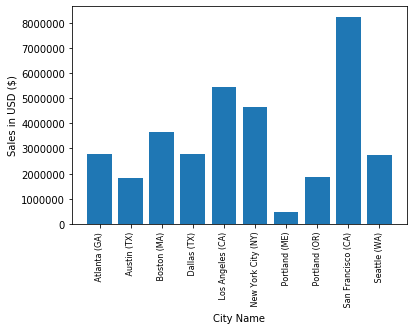

In [13]:
import matplotlib.pyplot as plt

# cities = all_data['City'].unique()  this is not in proper order

cities = [city for city, df in all_data.groupby('City')]  # this will return cities in same order as sales

#  plt.bar(x,y)   x is our month and Y is the sales
plt.bar(cities, results['Sales'])  # values of sales is stored in results so we are extracting it from resuslts

plt.xticks(cities, rotation = 'vertical', size=8)  # i want to see every month here
plt.ylabel('Sales in USD ($)')  # name of the y axis
plt.xlabel('City Name')  # name of the X asixs

plt.show()

 when I first ran the code which I commented out It was showing Austin has the higest sales but according to our data san francisco has the highest sale so there was an irregularities that is the order of the parameters X and Y on which we are plotting our grapho was not same because of that code 


when we are using .unique function to find the unique cities and store it in our X parameter it was not the same order as sales values so to avoid this I have to change the order of the cities. I did this using list comprehemsion and .groupby function

old code will be commented out so that we can look into our mistakes too
now after modifying our code we get the same plot as table is showing

"We can see from the graph that San Francisco has the highest sales compared to other cities"



### Question 3: what time should we display adertisements to maximize likelihood of customer's buying product

In [14]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


let's first convert the order date column which is a string into datetime object using pandas only

"to_datetime()" function is used to convert string into date time object

and then I used ".dt.hour" and ".dt.minute" function to grab the hour and minute from the Date. Because of the datetime function it happened easily without any string indeing and I created a 2 new columns Hour and Minute so that I can tell when to run ads

In [15]:
# to_datetime() function is used to convert string into date time object
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [16]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute    # this can be done easily using date time object
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


and then again create the visualization but this time I used line chart so that we can see the proper graph of increase and decrease of sale at particular timeline

Text(0.5, 0, 'Hours')

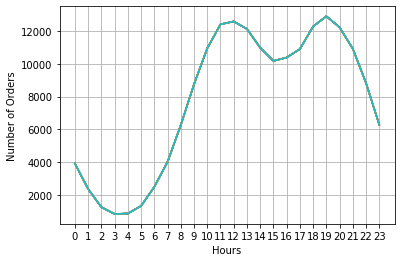

In [17]:
hours = [hour for hour, df in all_data.groupby('Hour')]  # this will return Minutes in same order as sales

plt.plot(hours, all_data.groupby(['Hour']).count()) #plt."plot" is used for line chart

plt.xticks(hours)

plt.grid()  # to make those grid in the graph for better visualizations

plt.ylabel('Number of Orders')  # name of the y axis
plt.xlabel('Hours')  # name of the X asixs

so to answer the question we can look into this line graph and can say that 11AM and 12PM is the peak then 6PM and 7PM is the peak again so to run the advertisement at this time can increase the sales.

you can also see that after 7AM sales starts increasing till 12PM so we can run the advertisement in this timeslot 7-12 in which sales will increase exponentially but sales will br at peak when time will be 11AM and 12PM


this is for all cities we can deep dive and check for the specific cities also for the detailed analysis

### Question 4: What products are most often sold together?

means if the order ID is same means those products were sold together like you can see in the dataframe

for Order ID: 176560  there are 2 product having the same id i.e Google Phone and Wired Headphones so we have to find this type only

so let's look for the duplicate values

In [18]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


we can easily identify duplicate columns using ".duplicated()" function 

 syntax : df.duplicated(subset=None, keep='first')
 
Docstring:
Return boolean Series denoting duplicate rows, optionally only
considering certain columns.

keep : {'first', 'last', False}, default 'first'
    - "first" : Mark duplicates as ``True`` except for the
      first occurrence.
    - ``last`` : Mark duplicates as ``True`` except for the
      last occurrence.
      
      
    - False : Mark all duplicates as ``True``.
    
    
    
I want all the duplicate value that is why I keep = False


In [19]:
# so this will check all the cells in order id column and see which ones are duplicated
df = all_data[all_data['Order ID'].duplicated(keep = False)]   # you can see doc string by shift + tab

df['Groups'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) 
# this code is used to print all the product having same id together only and seperated by comma


# dropping duplicate occurence
df =df[['Order ID', 'Groups']].drop_duplicates()

df.head()



C:\Users\SUMIT SARDA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order ID,Groups
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"


Itertools.combinations() falls under the third subcategory called “Combinatoric Generators”. 
Combinatoric Generators are those iterators that are used to simplify combinatorial constructs such as permutations, combinations, and Cartesian products

In [20]:
# so now we need to count pairs of what occurs together most frequently

from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Groups']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) # 2 indicates no of 2 itmes sold together we can change it to 3, 4 as you wish

    
for key, value in count.most_common(10):
    print(key,value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Through this we can say that most of time people often ends up buying Lightning Charging Cable when they tend to buy Iphone so we can use this for advertise products according to what byuer buys first. 

Like people buy wired headphones with iphone too but if we show them Lightning Charging Cable then probability is higher that they'll end up buying too.

### Question 5: What product sold the most? Why do you think it sold the most? 

In [21]:
all_data.head()
    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


 really all we have to do to figure out what products sold the most is we need to sum up the quantity ordered based on grouping by the product so let's see how we can do that

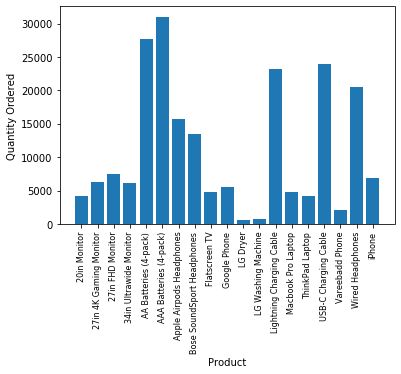

In [22]:
product_group = all_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=8)
plt.show()


We can see from the graph that AAA Batteries is sold most follwed by AA Batteries and LG Dryer and Washing Machine sold least because I think the AAA Batteries are cheap in price and LG Dryer and Washing Machine is highly expensive to buy that is why sale of AAA Batteries is highest and sales of the LG Dryer is lowest.
 
 
 
 lets run hypotheses to prove this 
 so what we could do is overlay this graph with actual prices of the items and see if there is that like kind of direct correlation 
 
 first we get the mean of prices for each product using ".mean()" function"

In [23]:
prices = all_data.groupby('Product').mean()['Price Each']

print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


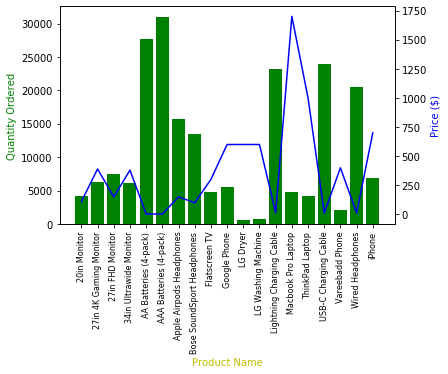

In [24]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name', color='y')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()  

# this code is taken from the reference : https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

As you can see in the bar chart here when the PRICE of the product is low then QUANTITY ORDERED for that product is high means PRICE low SALE high

this is the correlation between price and quantity ordered


this way we can guve the answer of the 5th question is product which sold the most id AAA batteries because the PRICE is very low

#### Few Points to Notice: these are the most expensive products  

1) Macbook Pro Laptop is the most expensive product 1700.00 followed by

2) ThinkThinkPad Laptop  999.99  then

3) iphone 700.00 then

4) Google Phone, LG Dryer and LG Washing Machine 600.00

LG dryer being the least expensive product out of all the expensive product still it's sales are less. On ohter hand Macbook Pro and Thinkpad Laptop being the most expensive products still has the more sales then LG Dryer. Same with iphone and Google Phone but why?

Because I think the there are more number of people who needs Macbook pro not LG Dryer. 

##### let's see this in this way:
suppose there is a family consists of 6 members out of which 4 are adults and 2 are children so let say they want a Dryer so they'll get only 1 Dryer because one dryer will be enough for entire family. Now there are 4 adults means they are either students or working professional so they'all will require a laptop either be Macbook or Thinkpad so 1 laptop will not enough for entire family, they need to buy 4 Laptops same goes with iphone and google phone that is why 

sales ofiphone > sales of Google phone > sales of Laptops > sales of LG Dryer and Wachine Machine




### THIS IS THE DETAILED ANALYSIS OF THE SALED DATA WHICH WILL HELP TO SOLVE VARIOUS BUSINESS PROBLEMS AND FULLFILL THE NEEDS OF STAKEHOLDERS